In [1]:
import nltk

In [2]:
nltk.download('book',quiet=True)
#from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis


LookupError: 
**********************************************************************
  Resource [93minaugural[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('inaugural')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/inaugural[0m

  Searched in:
    - 'C:\\Users\\admin/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


True

In [6]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma_raw=nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:100])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a


In [10]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [16]:
from nltk.tokenize import RegexpTokenizer
retokenize=RegexpTokenizer("[\w]+")
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1=PorterStemmer()
st2=LancasterStemmer()

words=["fly","flies","flying","flew","flown"]

print("Porter Stemmer :",[st1.stem(w) for w in words])
print("Lancaster Stemmer :",[st2.stem(w) for w in words])

Porter Stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer : ['fly', 'fli', 'fly', 'flew', 'flown']


In [21]:
from nltk.stem import WordNetLemmatizer

lm=WordNetLemmatizer()

[lm.lemmatize(w,pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [23]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [24]:
from nltk.tag import pos_tag
sentence="Emma refused to permit us to obtain the refuse permit"
tagged_list=pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [25]:
nouns_list=[t[0] for t in tagged_list if t[1]=="NN"]
nouns_list

['refuse', 'permit']

In [26]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [27]:
from nltk import Text
text=Text(retokenize.tokenize(emma_raw))
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


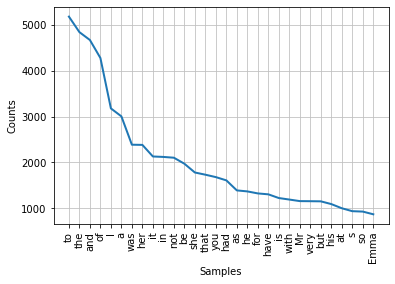

In [29]:
import matplotlib.pyplot as plt
text.plot(30)
plt.show()

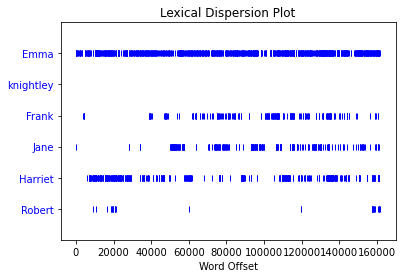

In [30]:
text.dispersion_plot(['Emma','knightley','Frank','Jane','Harriet','Robert'])

In [31]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [32]:
fd=text.vocab()
type(fd)

nltk.probability.FreqDist

In [36]:
from nltk import FreqDist

stopwords=['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens=pos_tag(retokenize.tokenize(emma_raw))
names_list=[t[0] for t in emma_tokens if t[1]=='NNP' and t[0] not in stopwords]
fd_names=FreqDist(names_list)
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [37]:
fd_names.N(),fd_names['Emma'],fd_names.freq('Emma')

(7863, 830, 0.10555767518758744)

In [38]:
fd_names.most_common(20)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208),
 ('Hartfield', 160),
 ('Oh', 156),
 ('Bates', 141),
 ('Highbury', 123),
 ('John', 90),
 ('Randalls', 89),
 ('Smith', 89),
 ('Martin', 85),
 ('No', 79),
 ('Perry', 79)]

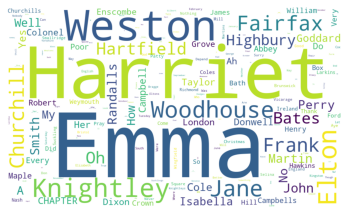

In [42]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=600,background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

import tweepy
print(tweepy.__version__)

import konlpy
konlpy.__version__

3.10.0


'0.5.2'

In [6]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [7]:
c=kolaw.open('constitution.txt').read()
print(c[:500])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [25]:
from konlpy.tag import*

hannanum = Hannanum()
kkma=Kkma()
komoran=Komoran()
okt=Okt()

In [13]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [14]:
d=kobill.open('1809890.txt').read()
print(d[:100])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이


In [26]:
hannanum.nouns(c[:100])

['대한민국헌법',
 '유구',
 '역사',
 '전통',
 '빛',
 '우리',
 '대한국민',
 '3·1운동',
 '건립',
 '대한민국임시정부',
 '법통',
 '불의',
 '항거',
 '4·19민주이념',
 '계승',
 '조국',
 '민주개혁',
 '평화적',
 '통일']

In [17]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임시정부',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '4',
 '19',
 '19민주이념',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '개혁',
 '평화적',
 '통일']

In [22]:
#komoran은 빈줄이 있으면 에러
#komoran.nouns(c[:40])
komoran.nouns('\n'.join([s for s in c[:40].split('\n') if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [30]:
okt.nouns(c[:50])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임']

In [27]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [33]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [34]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [35]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [36]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [37]:
komoran.pos(c[:40])

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [38]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [39]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [48]:
import pandas as pd
tagsets=pd.DataFrame()
N=67
tagsets['Hannanum-기호']=list(hannanum.tagset.keys())+list('*'*(N-len(hannanum.tagset)))
tagsets['Hannanum-품사']=list(hannanum.tagset.values())+list('*'*(N-len(hannanum.tagset)))
tagsets['kkma-기호']=list(kkma.tagset.keys())+list('*'*(N-len(kkma.tagset)))
tagsets['kkma-품사']=list(kkma.tagset.values())+list('*'*(N-len(kkma.tagset)))
tagsets['komoran-기호']=list(komoran.tagset.keys())+list('*'*(N-len(komoran.tagset)))
tagsets['komoran-품사']=list(komoran.tagset.values())+list('*'*(N-len(komoran.tagset)))
tagsets['okt-기호']=list(okt.tagset.keys())+list('*'*(N-len(okt.tagset)))
tagsets['okt-품사']=list(okt.tagset.values())+list('*'*(N-len(okt.tagset)))
tagsets

,Hannanum-기호,Hannanum-품사,kkma-기호,kkma-품사,komoran-기호,komoran-품사,okt-기호,okt-품사
0,E,어미,EC,연결 어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,EF,종결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,EP,선어말어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,ETM,관형형 전성 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,ETN,명사형 전성 어미,Determiner,관형사
...,...,...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*,*,*
63,*,*,XR,어근,*,*,*,*
64,*,*,XSA,형용사 파생 접미사,*,*,*,*
65,*,*,XSN,명사파생 접미사,*,*,*,*


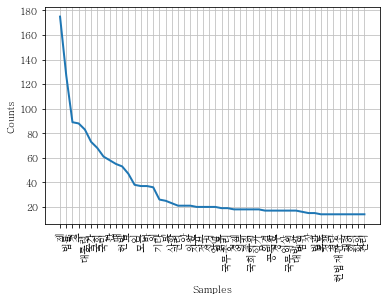

<function matplotlib.pyplot.show(close=None, block=None)>

In [50]:
from nltk import Text
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
font_path='c:/Windows/fonts/batang.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

kolaw=Text(okt.nouns(c),name='kolow')
kolaw.plot(50)
plt.show

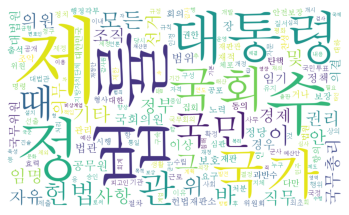

In [53]:
from wordcloud import WordCloud
font_path='c:/Windows/fonts/batang.ttc'

wc=WordCloud(width=1000,height=600,background_color='white',font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()